<a href="https://colab.research.google.com/github/anujsaxena/Python/blob/main/NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

Nowadays companies want to understand, what went wrong with their latest products? What users and the general public think about the latest feature? You can quantify such information with reasonable accuracy using sentiment analysis.
Quantifying users content, idea, belief, and opinion is known as sentiment analysis. User's online post, blogs, tweets, feedback of product helps business people to the target audience and innovate in products and services. Sentiment analysis helps in understanding people in a better and more accurate way. It is not only limited to marketing, but it can also be utilized in politics, research, and security.

Human communication just not limited to words, it is more than words. Sentiments are combination words, tone, and writing style. As a data analyst, It is more important to understand our sentiments, what it really means?

There are mainly two approaches for performing sentiment analysis.
Lexicon-based: count number of positive and negative words in given text and 
the larger count will be the sentiment of text.

Machine learning based approach: Develop a classification model, which is trained using the pre-labelled dataset of positive, negative, and neutral.
In this Tutorial, you will use the second approach(Machine learning based approach). This is how you learn sentiment and text classification with a single example.
Text Classification
Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc. In the next section, you will learn how you can do text classification in python.

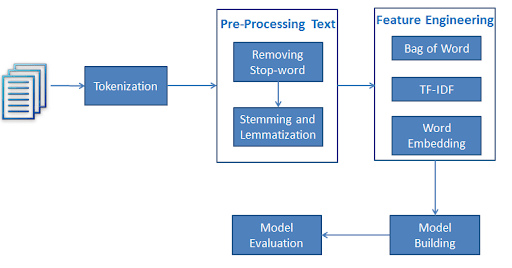




In [1]:
import pandas as pd
data = pd.read_csv('train.tsv', sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

This data has 5 sentiment labels:

0 - negative

1 - somewhat negative 

2 - neutral 

3 - somewhat positive 

4 - positive


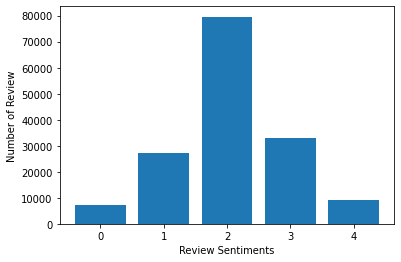

In [6]:
import matplotlib.pyplot as plt

Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()


# **Feature Generation using Bag of Words**

Bag-of-Words is a very intuitive approach to this problem, the methods comprise of:

1.	Splitting the documents into tokens by following some sort of pattern.
2.	Assigning a weight to each token proportional to the frequency with which it shows up in the document and/or corpora.
3.	Creating a document-term matrix with each row representing a document and each column addressing a token.

The vectorizer objects provided by Scikit-Learn are quite reliable right out of the box, they allow us to perform all the above steps at once efficiently, and even apply preprocessing and rules regarding the number and frequency of tokens. To top it all off, they come in three different flavors (there are other versions like DictVectorizers, but they are not that common):

1. Count Vectorizer: The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

2. Hash Vectorizer: This one is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved.

3. TF-IDF Vectorizer: TF-IDF stands for "term frequency-inverse document frequency", meaning the weight assigned to each token not only depends on its frequency in a document but also how recurrent that term is in the entire corpora.


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])
print(text_counts)


  (0, 11671)	1
  (0, 4517)	1
  (0, 3444)	1
  (0, 294)	1
  (0, 5735)	2
  (0, 5751)	1
  (0, 5512)	1
  (0, 9065)	1
  (0, 593)	1
  (0, 584)	1
  (0, 12673)	1
  (1, 11671)	1
  (1, 4517)	1
  (1, 3444)	1
  (1, 294)	1
  (1, 5735)	1
  (1, 5751)	1
  (2, 11671)	1
  (4, 11671)	1
  (5, 4517)	1
  (5, 3444)	1
  (5, 294)	1
  (5, 5735)	1
  (5, 5751)	1
  (7, 4517)	1
  :	:
  (156050, 11305)	1
  (156050, 9054)	1
  (156051, 11305)	1
  (156051, 9054)	1
  (156052, 11305)	1
  (156053, 11281)	1
  (156053, 1281)	1
  (156053, 5252)	1
  (156053, 6156)	1
  (156053, 1006)	1
  (156053, 2271)	1
  (156054, 11281)	1
  (156054, 5252)	1
  (156054, 6156)	1
  (156054, 1006)	1
  (156054, 2271)	1
  (156055, 11281)	1
  (156055, 6156)	1
  (156056, 5252)	1
  (156056, 1006)	1
  (156056, 2271)	1
  (156057, 1006)	1
  (156057, 2271)	1
  (156058, 1006)	1
  (156059, 2271)	1


In [9]:
#split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)


# **Model Building and Evaluation**
Let's build the Text Classification Model using TF-IDF.

First, import the MultinomialNB module and create a Multinomial Naive Bayes classifier object using MultinomialNB() function.
Then, fit your model on a train set using fit() and perform prediction on the test set using predict().


In [10]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.6049169122986885


# **Feature Generation using TF-IDF**
In Term Frequency(TF), you just count the number of words occurred in each document. The main issue with this Term Frequency is that it will give more weight to longer documents. Term frequency is basically the output of the BoW model.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [12]:
#split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=123)

In [13]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.608398479217395
